In [1]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine, text
from sqlalchemy import URL
from sqlalchemy import create_engine

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
def create_table(username, password,db_name):
    url_object = URL.create(
        "mysql+mysqlconnector",
        username=username,
        password=password,
        host="localhost",
        database=db_name
    )
    return create_engine(url_object)

In [3]:
engine = create_table('root', 'Farideh@2376', 'SuperStore')

In [4]:
query = """
SELECT Sales, Quantity,  discount, Profit, `Shipping Cost`,`Product Name`, p.Category, p.`Sub-Category`,Market, `Ship Mode`,Segment, COALESCE(returned, 0) AS returned
FROM order_detail
JOIN product p ON order_detail.`Product ID` = p.`Product ID`
JOIN shipping s ON order_detail.`Order ID` = s.`Order ID`
JOIN `order` o ON o.`Order ID` = order_detail.`Order ID`
JOIN customer c ON o.`Customer ID` = c.`Customer ID`
LEFT JOIN returned r ON order_detail.`Order ID` = r.`Order ID`
"""


df=pd.DataFrame(engine.connect().execute(text(query)))

In [5]:
df

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,2309.650,7,0.0,762.1850,933.570,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,US,Same Day,Consumer,0
1,1090.780,7,0.4,-290.8750,348.180,"Bevis Round Bullnose 29"" High Table Top",Furniture,Tables,US,Same Day,Consumer,0
2,19.440,3,0.0,9.3312,7.240,Xerox 212,Office Supplies,Paper,US,Same Day,Consumer,0
3,344.682,2,0.1,34.4220,65.350,"Brother Fax and Copier, Laser",Technology,Copiers,APAC,Second Class,Corporate,1
4,133.920,5,0.1,-6.0300,41.640,"Rogers Folders, Wire Frame",Office Supplies,Storage,APAC,Second Class,Corporate,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9.612,2,0.7,-21.1680,0.020,"Sanford Highlighters, Easy-Erase",Office Supplies,Art,Africa,Standard Class,Corporate,0
49666,84.000,5,0.0,9.2000,0.019,"Green Bar Message Books, Multicolor",Office Supplies,Paper,LATAM,First Class,Consumer,0
49667,26.940,2,0.0,1.8600,0.010,"Eaton Parchment Paper, Premium",Office Supplies,Paper,APAC,Same Day,Corporate,0
49668,58.050,5,0.1,19.9500,0.010,"Avery Binder, Economy",Office Supplies,Binders,APAC,Standard Class,Home Office,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          49670 non-null  float64
 1   Quantity       49670 non-null  int64  
 2   discount       49670 non-null  float64
 3   Profit         49670 non-null  float64
 4   Shipping Cost  49670 non-null  float64
 5   Product Name   49670 non-null  object 
 6   Category       49670 non-null  object 
 7   Sub-Category   49670 non-null  object 
 8   Market         49670 non-null  object 
 9   Ship Mode      49670 non-null  object 
 10  Segment        49670 non-null  object 
 11  returned       49670 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 4.5+ MB


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler


columns_to_scale = [ 'Profit', 'Shipping Cost']


scaler = MaxAbsScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,2309.650,7,0.0,0.090737,1.000000,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,US,Same Day,Consumer,0
1,1090.780,7,0.4,-0.034628,0.372955,"Bevis Round Bullnose 29"" High Table Top",Furniture,Tables,US,Same Day,Consumer,0
2,19.440,3,0.0,0.001111,0.007755,Xerox 212,Office Supplies,Paper,US,Same Day,Consumer,0
3,344.682,2,0.1,0.004098,0.070000,"Brother Fax and Copier, Laser",Technology,Copiers,APAC,Second Class,Corporate,1
4,133.920,5,0.1,-0.000718,0.044603,"Rogers Folders, Wire Frame",Office Supplies,Storage,APAC,Second Class,Corporate,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9.612,2,0.7,-0.002520,0.000021,"Sanford Highlighters, Easy-Erase",Office Supplies,Art,Africa,Standard Class,Corporate,0
49666,84.000,5,0.0,0.001095,0.000020,"Green Bar Message Books, Multicolor",Office Supplies,Paper,LATAM,First Class,Consumer,0
49667,26.940,2,0.0,0.000221,0.000011,"Eaton Parchment Paper, Premium",Office Supplies,Paper,APAC,Same Day,Corporate,0
49668,58.050,5,0.1,0.002375,0.000011,"Avery Binder, Economy",Office Supplies,Binders,APAC,Standard Class,Home Office,0


In [8]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(['Category','Market','Product Name','Ship Mode','Sub-Category','Segment'])
df_encoded = encoder.fit_transform(df)
df_encoded.head(10)

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,2309.650,7,0.0,0.090737,1.000000,1,1,1,1,1,1,0
1,1090.780,7,0.4,-0.034628,0.372955,2,2,2,1,1,1,0
2,19.440,3,0.0,0.001111,0.007755,3,3,3,1,1,1,0
3,344.682,2,0.1,0.004098,0.070000,4,1,4,2,2,2,1
4,133.920,5,0.1,-0.000718,0.044603,5,3,5,2,2,2,1
5,3709.400,9,0.1,-0.034377,0.989353,6,2,6,2,2,2,1
6,70.794,2,0.1,0.002992,0.011226,7,1,1,2,2,2,1
7,5175.170,9,0.1,0.109521,0.980633,8,1,7,2,3,1,0
8,16.038,2,0.1,-0.000155,0.002410,9,3,8,2,3,1,0
9,27.270,1,0.1,0.001082,0.001735,10,3,8,2,3,1,0


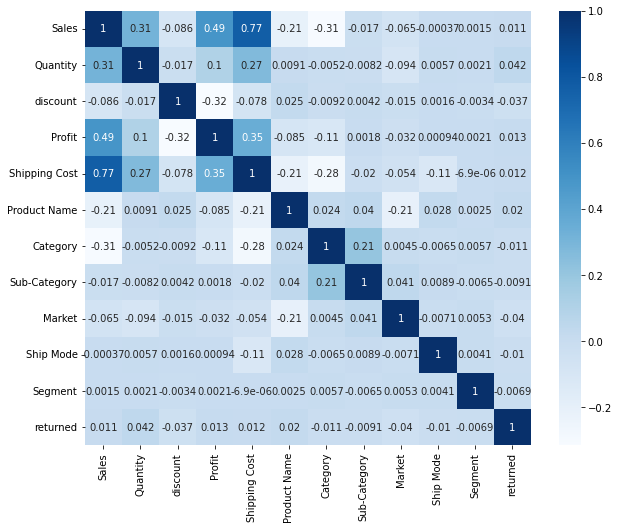

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(),annot=True,cmap='Blues');

In [10]:
X = df_encoded.drop(["Profit"],axis=1)
y = df_encoded['Profit']


In [11]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation and test sets with ratio of 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
X_train

,Sales,Quantity,discount,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
28676,206.658,2,0.10,0.018617,1258,1,1,2,2,1,0
39317,25.936,1,0.20,0.006716,1026,3,12,6,2,2,0
15298,414.330,7,0.00,0.042653,2059,2,6,2,4,1,0
23261,216.329,2,0.37,0.027946,1621,2,17,2,4,1,0
20904,3.900,2,0.00,0.000321,1374,3,11,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,449.040,4,0.40,0.072923,1080,3,16,6,3,3,0
44732,13.020,1,0.00,0.002967,1645,3,8,3,3,1,0
38158,100.080,2,0.50,0.007691,500,1,1,3,4,3,0
860,959.760,3,0.00,0.373277,667,1,4,2,1,2,0


# RidgeRegression

In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score,r2_score
model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)

# Finally, predict on test data
pred_test_Ridge = model_Ridge.predict(X_test)

r2_test_Ridge = r2_score(y_test, pred_test_Ridge).round(4)
mse_test_Ridge = mean_squared_error(y_test, pred_test_Ridge).round(4)
rmse_test_Ridge = np.sqrt(mean_squared_error(y_test, pred_test_Ridge)).round(4)
mae_test_Ridge = mean_absolute_error(y_test, pred_test_Ridge).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_Ridge)
print(f'\033[92m')
print('MSE       : ', mse_test_Ridge)
print('RMSE      : ', rmse_test_Ridge)
print('MAE       : ', mae_test_Ridge)


R2 Score  :  0.4012

MSE       :  0.0002
RMSE      :  0.0142
MAE       :  0.0069


# XGBRegressor 

In [ ]:
from xgboost import XGBRegressor 

model_xgb = XGBRegressor(random_state=42)


param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.1,0.2],
    'max_depth': [10,20,30],
    'min_child_weight': [5,7,9],
    'gamma': [0,0.01],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}


grid_search = GridSearchCV(model_xgb, param_grid, cv=5, scoring='r2',n_jobs=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


print(best_params)

y_pred = best_model.predict(X_val)

r2 = r2_score(y_val, y_pred)
print(r2)

# Finally, predict on test data
pred_test_xgb = model_xgb.predict(X_test)

r2_test_xgb = r2_score(y_test, pred_test_xgb).round(4)
mse_test_xgb = mean_squared_error(y_test, pred_test_xgb).round(4)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, pred_test_xgb)).round(4)
mae_test_xgb = mean_absolute_error(y_test, pred_test_xgb).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_xgb)
print(f'\033[92m')
print('MSE       : ', mse_test_xgb)
print('RMSE      : ', rmse_test_xgb)
print('MAE       : ', mae_test_xgb)

# RandomForestRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor()
model_RandomForestRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_RandomForestRegressor = model_RandomForestRegressor.predict(X_test)

r2_test_RandomForestRegressor = r2_score(y_test, pred_test_RandomForestRegressor).round(4)
mse_test_RandomForestRegressor = mean_squared_error(y_test, pred_test_RandomForestRegressor).round(4)
rmse_test_RandomForestRegressor = np.sqrt(mean_squared_error(y_test, pred_test_RandomForestRegressor)).round(4)
mae_test_RandomForestRegressor = mean_absolute_error(y_test, pred_test_RandomForestRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_RandomForestRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_RandomForestRegressor)
print('RMSE      : ', rmse_test_RandomForestRegressor)
print('MAE       : ', mae_test_RandomForestRegressor)


R2 Score  :  0.7376

MSE       :  0.0001
RMSE      :  0.0094
MAE       :  0.0039


# HistGradientBoostingRegressor

In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_HistGradientBoostingRegressor = HistGradientBoostingRegressor()
model_HistGradientBoostingRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_HistGradientBoostingRegressor = model_HistGradientBoostingRegressor.predict(X_test)

r2_test_HistGradientBoostingRegressor = r2_score(y_test, pred_test_HistGradientBoostingRegressor).round(4)
mse_test_HistGradientBoostingRegressor = mean_squared_error(y_test, pred_test_HistGradientBoostingRegressor).round(4)
rmse_test_HistGradientBoostingRegressor = np.sqrt(mean_squared_error(y_test, pred_test_HistGradientBoostingRegressor)).round(4)
mae_test_HistGradientBoostingRegressor = mean_absolute_error(y_test, pred_test_HistGradientBoostingRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_HistGradientBoostingRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_HistGradientBoostingRegressor)
print('RMSE      : ', rmse_test_HistGradientBoostingRegressor)
print('MAE       : ', mae_test_HistGradientBoostingRegressor)


R2 Score  :  0.7204

MSE       :  0.0001
RMSE      :  0.0097
MAE       :  0.004


# ExtraTreesRegressor

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

model_ExtraTreesRegressor = ExtraTreesRegressor(n_estimators=100, random_state=0)
model_ExtraTreesRegressor.fit(X_train, y_train)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [5, 7, 9],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model_ExtraTreesRegressor, param_grid, cv=5, scoring='r2', n_jobs=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

# Finally, predict on test data
pred_test_ExtraTreesRegressor = best_model.predict(X_test)

r2_test_ExtraTreesRegressor = r2_score(y_test, pred_test_ExtraTreesRegressor).round(4)
mse_test_ExtraTreesRegressor = mean_squared_error(y_test, pred_test_ExtraTreesRegressor).round(4)
rmse_test_ExtraTreesRegressor = np.sqrt(mean_squared_error(y_test, pred_test_ExtraTreesRegressor)).round(4)
mae_test_ExtraTreesRegressor= mean_absolute_error(y_test, pred_test_ExtraTreesRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_ExtraTreesRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_ExtraTreesRegressor)
print('RMSE      : ', rmse_test_ExtraTreesRegressor)
print('MAE       : ', mae_test_ExtraTreesRegressor)


{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}

R2 Score  :  0.6551

MSE       :  0.0001
RMSE      :  0.0108
MAE       :  0.0044


# AdaBoostRegressor

In [17]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoostRegressor = AdaBoostRegressor()
model_AdaBoostRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_AdaBoostRegressor = model_AdaBoostRegressor.predict(X_test)

r2_test_AdaBoostRegressor = r2_score(y_test, pred_test_AdaBoostRegressor).round(4)
mse_test_AdaBoostRegressor = mean_squared_error(y_test, pred_test_AdaBoostRegressor).round(4)
rmse_test_AdaBoostRegressor = np.sqrt(mean_squared_error(y_test, pred_test_AdaBoostRegressor)).round(4)
mae_test_AdaBoostRegressor= mean_absolute_error(y_test, pred_test_AdaBoostRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_AdaBoostRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_AdaBoostRegressor)
print('RMSE      : ', rmse_test_AdaBoostRegressor)
print('MAE       : ', mae_test_AdaBoostRegressor)



R2 Score  :  0.3358

MSE       :  0.0002
RMSE      :  0.0149
MAE       :  0.0109


In [18]:
models = pd.DataFrame({
    
    'Model': [
        'RidgeRegression', 'XGBRegressor', 'RandomForestRegressor',
        'HistGradientBoostingRegressor', 'ExtraTreesRegressor',
        'AdaBoostRegressor'
    ],
    
    'R2 Score': [
        r2_test_Ridge, r2_test_xgb, r2_test_RandomForestRegressor,
        r2_test_HistGradientBoostingRegressor, r2_test_ExtraTreesRegressor,
        r2_test_AdaBoostRegressor
    
    ],
    
    'MSE': [
        mse_test_Ridge,  mse_test_xgb, mse_test_RandomForestRegressor,
        mse_test_HistGradientBoostingRegressor, mse_test_ExtraTreesRegressor,
        mse_test_AdaBoostRegressor
    ],
    
    'RMSE': [
         rmse_test_Ridge,  rmse_test_xgb, rmse_test_RandomForestRegressor,
        rmse_test_HistGradientBoostingRegressor, rmse_test_ExtraTreesRegressor,
        rmse_test_AdaBoostRegressor
    ],
    
    'MAE': [
         mae_test_Ridge, mae_test_xgb, mae_test_RandomForestRegressor,
         mae_test_HistGradientBoostingRegressor, mae_test_ExtraTreesRegressor,
         mae_test_AdaBoostRegressor
    ]
    
})


In [19]:
models

,Model,R2 Score,MSE,RMSE,MAE
0,RidgeRegression,0.4012,0.0002,0.0142,0.0069
1,XGBRegressor,0.7385,0.0001,0.0094,0.0039
2,RandomForestRegressor,0.7376,0.0001,0.0094,0.0039
3,HistGradientBoostingRegressor,0.7204,0.0001,0.0097,0.0040
4,ExtraTreesRegressor,0.6551,0.0001,0.0108,0.0044
5,AdaBoostRegressor,0.3358,0.0002,0.0149,0.0109


In [20]:
models.sort_values(by='R2 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,R2 Score,MSE,RMSE,MAE
XGBRegressor,0.738500,0.000100,0.009400,0.003900
RandomForestRegressor,0.737600,0.000100,0.009400,0.003900
HistGradientBoostingRegressor,0.720400,0.000100,0.009700,0.004000
ExtraTreesRegressor,0.655100,0.000100,0.010800,0.004400
RidgeRegression,0.401200,0.000200,0.014200,0.006900
AdaBoostRegressor,0.335800,0.000200,0.014900,0.010900


In [21]:
models.sort_values(by='R2 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,R2 Score,MSE,RMSE,MAE
XGBRegressor,0.737000,0.000100,0.009800,0.004000
HistGradientBoostingRegressor,0.736300,0.000100,0.009900,0.004200
RandomForestRegressor,0.733800,0.000100,0.009900,0.004000
ExtraTreesRegressor,0.632200,0.000100,0.011600,0.004500
AdaBoostRegressor,0.462800,0.000200,0.014100,0.010400
RidgeRegression,0.352400,0.000200,0.015400,0.006900
